In [1]:
import numpy as np
from scipy.linalg import fractional_matrix_power
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#defuine graph
G = nx.Graph(name='G')
for i in range(6):
  G.add_node(i, name=i)
  
#Define the edges and the edges to the graph
#edges = [(0,1),(0,2),(1,2),(0,3),(3,4),(3,5),(4,5)]
edges = [(0,1),(0,2),(0,3),(3,4),(3,5)]


G.add_edges_from(edges)

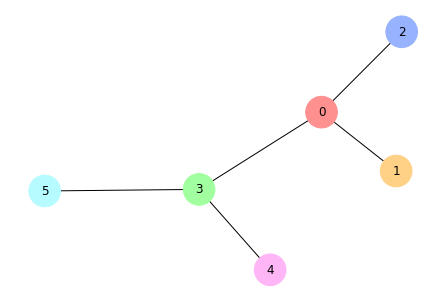

In [3]:
#Plot the graph
randomColors = ['#ff9090', '#ffd186', '#97b2fe', '#a2ff9f', '#ffb6f6', '#b6fbff']
color_map = []
for iColor, node in enumerate(G):
    color_map.append(randomColors[iColor % len(randomColors)])
nx.draw(G, node_color=color_map, with_labels=True, node_size=1000)
plt.show()


In [4]:
A = np.array(nx.attr_matrix(G, node_attr='name')[0])
X = np.array(nx.attr_matrix(G, node_attr='name')[1])

In [5]:
#X = np.identity(A.shape[0])
X

array([0, 1, 2, 3, 4, 5])

In [6]:
#X = np.array([1,1,1 , 1,1,1])
X

array([0, 1, 2, 3, 4, 5])

In [7]:
X = np.expand_dims(X,axis=1)

In [8]:
#Implement ReLu as activation function
def relu(x):
    return np.maximum(0,x)

In [14]:
#Initialize the weights
np.random.seed(77777)
n_h = 4 #number of neurons in the hidden layer
n_y = 2 #number of neurons in the output layer
W0 = np.random.randn(X.shape[1],n_h) * 0.01
W1 = np.random.randn(n_h,n_y) * 0.01

In [10]:
#Build GCN layer
#In this function, we implement numpy to simplify
def gcn(A,H,W):
    I = np.identity(A.shape[0]) #create Identity Matrix of A
    A_hat = A + I #add self-loop to A
    D = np.diag(np.sum(A_hat, axis=0)) #create Degree Matrix of A
    D_half_norm = fractional_matrix_power(D, -0.5) #calculate D to the power of -0.5
    eq1 = D_half_norm.dot(A_hat)
    eq2 = eq1.dot(D_half_norm)
    eq3 = eq2.dot(H)
    eq4 = eq3.dot(W)

    return relu(eq4)

In [15]:
#Do forward propagation
H1 = gcn(A,X,W0)
H2 = gcn(A,H1,W1)
print('Features Representation from GCN output:\n', H2)

Features Representation from GCN output:
 [[0.00030011 0.        ]
 [0.00013588 0.        ]
 [0.00017405 0.        ]
 [0.00057651 0.        ]
 [0.00044582 0.        ]
 [0.00048398 0.        ]]


In [12]:
def plot_features(H2):
    #Plot the features representation
    x = H2[:,0]
    y = H2[:,1]


    size = 1000

    plt.scatter(x,y,size)
    #plt.xlim([np.min(x)*0.85, np.max(x)*1.1])
    #plt.ylim([-1, 1])
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 1')

    for i,row in enumerate(H2):
        str = "{}".format(i)
        plt.annotate(str, (row[0],row[1]),fontsize=18, fontweight='bold', color = 'w'  )


    plt.show()





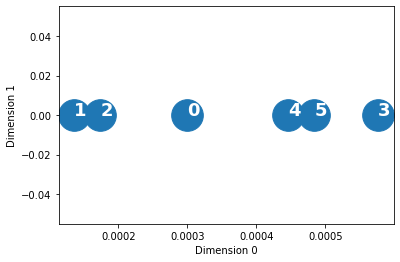

In [16]:
plot_features(H2)